<p>
<center>
    <h1>Description of the dataset</h1>
</center>
</p>


<p> 
            <div>
                The dataset was released by <strong>Aspiring Minds</strong> from the <strong>Aspiring Mind Employment Outcome 2015 (AMEO)</strong>. The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.
            </div>
</p>

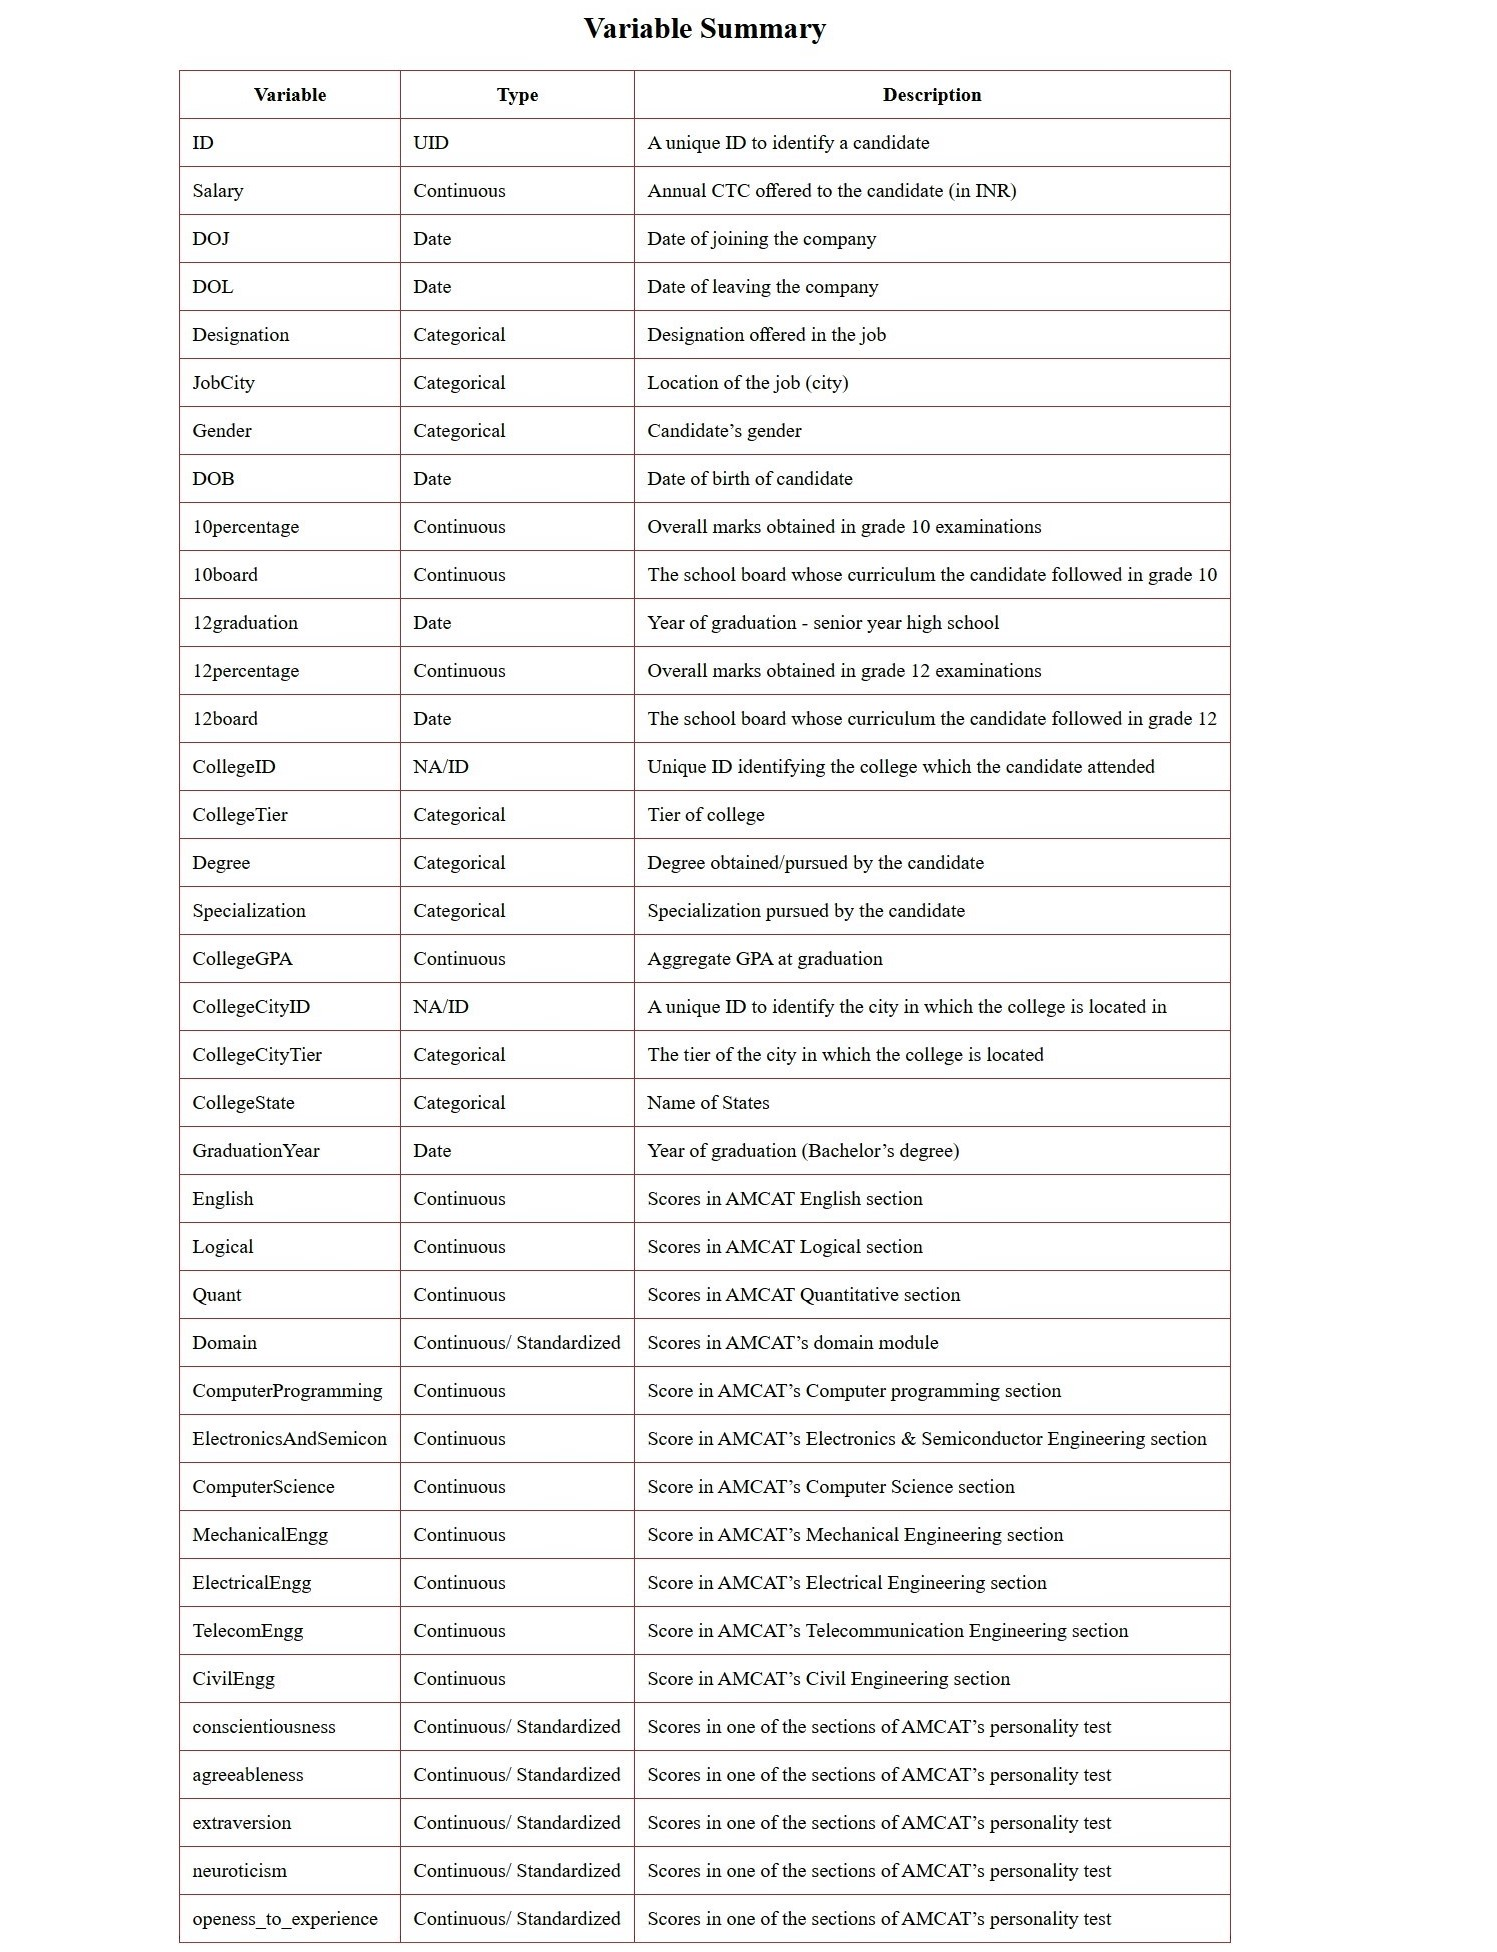

### Importing neessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import kurtosis,skew
import warnings
warnings.filterwarnings("ignore")


### Loading the dataset :

In [3]:
import pandas as pd
df=pd.read_excel(r"aspiring_minds_employability_outcomes_2015.xlsx", engine='openpyxl')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df1=df.copy() #Creation a copy to keep safe original dataset

In [5]:
#dropping the unnecessary columns

df1.drop(['Unnamed: 0','ID','CollegeID','CollegeCityID'], axis=1, inplace=True)

### Looking at statistical features:

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03
English,3998.0,501.649075,104.940021,180.0000,425.000000,500.000000,570.000000,8.750000e+02
Logical,3998.0,501.598799,86.783297,195.0000,445.000000,505.000000,565.000000,7.950000e+02


<h1>Observation:</h1>
<h4>There is lot of imbalance in the dataset as we can observe:</h4>
<p>
        <div>a. The scales of collegeGPA are different.</div>
        <div>b. There is some right skewness is salary distribution as there is difference between mean and median of salary.</div>
        <div>c. Columns like ID, collegeID,collegeTier,collegeCityID,CollegeCityTier doestn't making any sense to measure them.</div>
        <div>d. lots of impurity in some columns i.e they contain (nan,-1) values.</div>
</p>

In [7]:
df1.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

<p>
<h4>Independent Features:</h4>
<div>[ID, Gender, DOB, 10percentage, 10board, 12graduation,12percentage, 12board, CollegeID, CollegeTier, Degree,Specialization, collegeGPA, CollegeCityID, CollegeCityTier,CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon,ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg,CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience]</div>
<h4>Dependent Features:</h4>
<div>[Salary, Job Titles, and Job Locations]</div>
</p>

In [8]:
df1.loc[df1['collegeGPA']<=10,'collegeGPA']*=9.5

In [9]:
df1['collegeGPA'][:5]

0    78.00
1    70.06
2    70.00
3    74.64
4    73.90
Name: collegeGPA, dtype: float64

In [10]:
print(f'The number of unique element present in JobCity is : {df1.JobCity.nunique()}')
print('\n')
print(f'The unique element present in JobCity is : \n  {df1.JobCity.unique()}')


The number of unique element present in JobCity is : 339


The unique element present in JobCity is : 
  ['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' -1 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore'
 'Ahmedabad' 'Kochi/Cochin' 'Bankura' 'Bengaluru' 'Mysore ' 'Kanpur '
 'jaipur' 'Gurgaon ' 'bangalore' 'CHENNAI' 'Vijayawada' 'Kochi' 'Beawar'
 'Alwar' 'NOIDA' 'Greater noida' 'Siliguri ' 'raipur' 'gurgaon' 'Bhopal'
 'Faridabad' 'Jodhpur' 'udaipur' 'Muzaffarpur' 'Kolkata

### Observation:

From the column JobCity we can see that there are many annomaly present.

For Example:

**[bangalore,BAngalore,Banglore,BANGLORE, bangalore,banagalore]** all are **bangalore** bt writtten in different way and all these are taken as unique features.
Therefore we need to clear all these.


The number of unique element present in Specialization is : 46




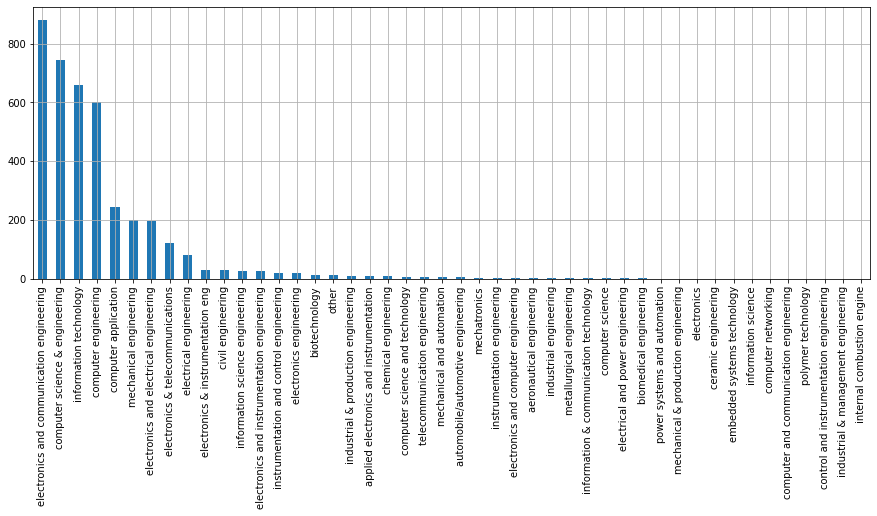

In [11]:
print(f'The number of unique element present in Specialization is : {df.Specialization.nunique()}')
print('\n')
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind = 'bar', figsize = (15, 5),grid = True)
plt.show()

<p>
<h4>Observation:</h4>
<div>There are 46 specialization classes but the names of some classes seems similar and some of them have very few records</div>
<div>so we are making groups of similar specialization classes and put some of them in other specialization as they have very few records.</div>
<h4>Group names: </h4>
<div>EC = Electronic and Communication</div>
<div>CS = Computer Science</div>
<div>other = All other specializations</div>
</p>

The unique element present in the Specilaation :  ['CS' 'EC' 'other']

The count of each element : 
  CS       2289
EC       1319
other     390
Name: Specialization, dtype: int64


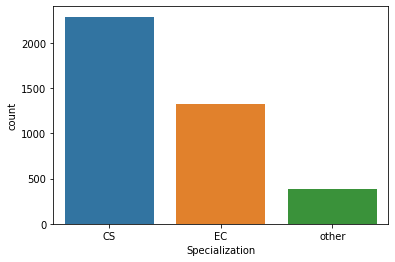

In [12]:
specialization_group =\
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'other',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'other',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'other',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'other',
 'automobile/automotive engineering' : 'other',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'other',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'other',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'other',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'other',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'other',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'other',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

 
df1['Specialization'] = df1['Specialization'].map(specialization_group)

print('The unique element present in the Specilaation : ', str(df1['Specialization'].unique()))
print()
print('The count of each element : \n ', str(df1['Specialization'].value_counts()))
sns.countplot(df1['Specialization'])

plt.show()

In [13]:
df1.Specialization.unique()


array(['CS', 'EC', 'other'], dtype=object)

In [14]:
print(f'The number of unique element present in Designation is : {df1.Designation.nunique()}')

The number of unique element present in Designation is : 419


In [15]:
#Filtering designation

l=[]
for i in df1['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')

engineer      1997
developer      668
others         538
analyst        402
manager        123
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designations, dtype: int64



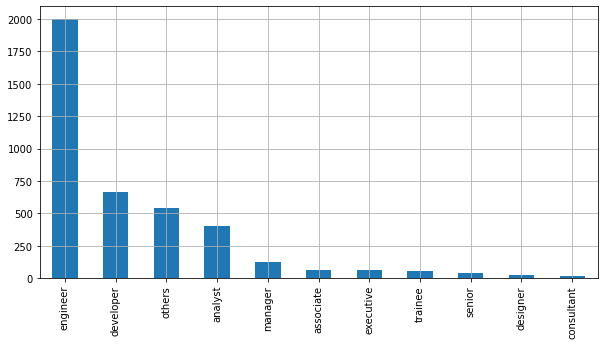

In [16]:
df1['Designations']=l
plt.figure(figsize=(10,5))
print(df1['Designations'].value_counts())
print()
df1['Designations'].value_counts().plot(kind='bar', grid=True)
plt.show()



In [17]:
df1[df1['12board']==0]['12board'].count()

359

In [18]:
df1['12board'].replace(to_replace = 0, value = 'cbse', inplace = True)

In [19]:
print(df1['12board'].value_counts())

cbse                                          1759
state board                                   1254
icse                                           129
up board                                        87
isc                                             45
                                              ... 
tamilnadu higher secondary education board       1
aurangabad board                                 1
nashik board                                     1
karnataka secondary education                    1
karnataka pre unversity board                    1
Name: 12board, Length: 339, dtype: int64


In [20]:
df1['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state 

In [21]:
state_board_list=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board',
       'up bord', 'gujarat board', 'intermideate','west bengal state council of technical education'
       'ghseb']

In [22]:
# dividing 12board column in 4 groups : 'state','cbse','icse' and 'n/a'
for i in state_board_list:
    df1['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df1['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df1['12board'].replace(i,'icse',inplace=True)

df1['12board'].replace(0,'n/a',inplace=True)

df1['12board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

state    2058
cbse     1762
icse      178
Name: 12board, dtype: int64



<AxesSubplot:>

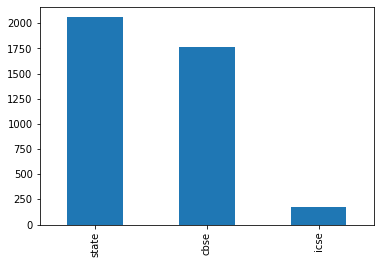

In [23]:

print(df1['12board'].value_counts())
print()
df1['12board'].value_counts().plot(kind='bar')

In [24]:
df1['10board'].value_counts()

cbse                                                   1395
state board                                            1164
0                                                       350
icse                                                    281
ssc                                                     122
                                                       ... 
board of secendary education orissa                       1
board of school education haryana                         1
karantaka secondary education and examination borad       1
metric                                                    1
sslc,karnataka                                            1
Name: 10board, Length: 275, dtype: int64

In [25]:
# replacing 0 with state baord as it is most frequent in 10board after dividing salary in 3 parts as menctioned above

df1['10board'].replace(to_replace = 0, value = 'state board', inplace = True)


state    2301
cbse     1413
icse      284
Name: 10board, dtype: int64


<AxesSubplot:>

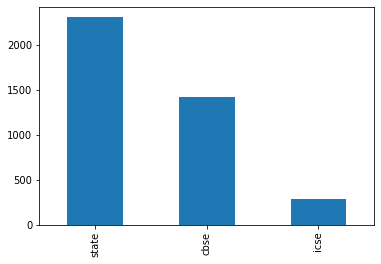

In [26]:
state_board_list=['board ofsecondary education,ap', 'state board',
       'mp board bhopal','cbsc' ,
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
        'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board','board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school',  'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'bihar school examination board patna',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

for i in state_board_list:
    df1['10board'].replace(i,'state',inplace=True)

cbse_board_list =['cbse', 'central board of secondary education','cbese','cbse board','cbse[gulf zone]','cbse ',
                  'central board of secondary education, new delhi']

for i in cbse_board_list:
    df1['10board'].replace(i,'cbse',inplace=True)

icse_board_list=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi','icse board , new delhi','icse board']
for i in icse_board_list:
    df1['10board'].replace(i,'icse',inplace=True)

df1['10board'].replace(0,'n/a',inplace=True)

print(df1['10board'].value_counts())

df1['10board'].value_counts().plot(kind='bar')


In [27]:
print(df1['Degree'].value_counts())


B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64


- As records of students having *MCA,Mtech,Msc* degree are less so we can combine them under one category as *'PG'*

In [28]:
Degree =\
{
'B.Tech/B.E.' : 'UG',
    'MCA' : 'PG',
    'M.Tech./M.E.' : 'PG',
    'M.Sc. (Tech.)' : 'PG'
}
df1['Degree'] = df1.Degree.map(Degree)

df1.Degree.value_counts()

UG    3700
PG     298
Name: Degree, dtype: int64

In [29]:
# To Reduce dimensions we are converting sates into 6 zones

df1['CollegeState'].unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

['South_Zone.' 'Other_Zone' 'North_Zone.']

North_Zone.    1417
South_Zone.    1314
Other_Zone     1267
Name: CollegeState, dtype: int64



<AxesSubplot:>

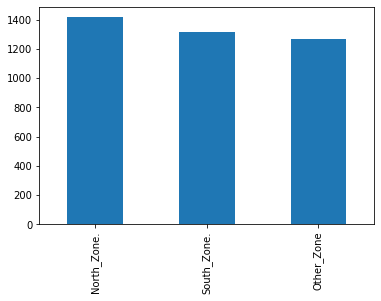

In [30]:

CollegeState_zone =\
{
'Himachal Pradesh': 'North_Zone.',
    'Punjab': 'North_Zone.',
    'Uttarakhand': 'North_Zone.',
    'Uttar Pradesh' : 'North_Zone.',
    'Haryana' : 'North_Zone.',
    
    'Andhra Pradesh' : 'South_Zone.',
    'Karnataka' : 'South_Zone.',
    'Kerala' : 'South_Zone.',
    'Tamil Nadu' : 'South_Zone.',
    'Telangana' : 'South_Zone.',
    
    'Bihar' : 'Other_Zone',
    'Orissa' : 'Other_Zone',
    'Jharkhand' : 'Other_Zone',
    'West Bengal' : 'Other_Zone',
    'Rajasthan'  : 'Other_Zone',
    'Gujarat' : 'Other_Zone',
    'Goa' : 'Other_Zone',
    'Maharashtra' : 'Other_Zone',
    'Madhya Pradesh' : 'Other_Zone', 
    'Chhattisgarh' : 'Other_Zone',
    'Assam' : 'Other_Zone',
    'Sikkim' : 'Other_Zone',
    'Nagaland' : 'Other_Zone',
    'Meghalaya' : 'Other_Zone',
    'Manipur' : 'Other_Zone',
    'Mizoram' : 'Other_Zone',
    'Tripura' : 'Other_Zone',
    'Arunachal Pradesh' : 'Other_Zone',
    'Union Territory' : 'Other_Zone',
    'Jammu and Kashmir' : 'Other_Zone',
    'Delhi' : 'Other_Zone'
    
}

df['CollegeState'] = df['CollegeState'].map(CollegeState_zone)

print(df['CollegeState'].unique())
print()
print(df['CollegeState'].value_counts())

print()

df['CollegeState'].value_counts().plot(kind='bar')


mean markes scored  71.68408579289645
median markes scored 71.8

Skewness: 0.16509502984855182
Kurtosis: 0.0699655758227884



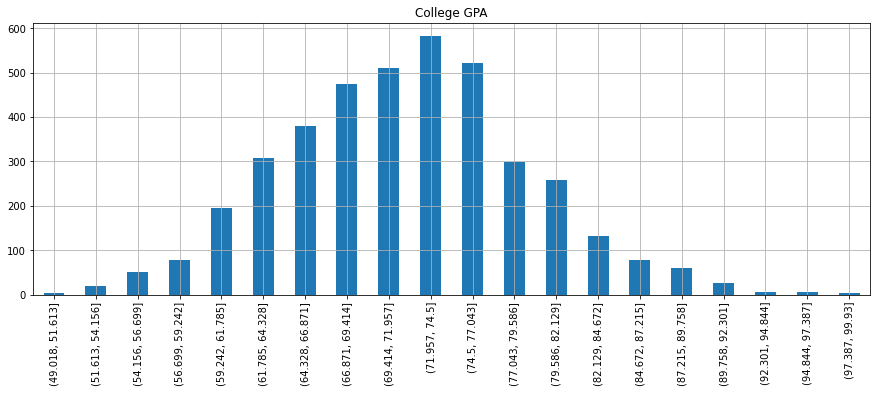

In [31]:

# Distribution of College grades

print('mean markes scored ',df1['collegeGPA'].mean())
print('median markes scored',df1['collegeGPA'].median())

print()

print('Skewness:',skew(df1['collegeGPA']))
print('Kurtosis:',kurtosis(df1['collegeGPA']))

print()

plt.figure(figsize=(15,5))
df1['collegeGPA'].value_counts(bins=20,sort=False).plot(kind='bar',title='College GPA',grid = True)
plt.show()

mean markes scored  74.46636568284127
median markes scored 74.4

Skewness: -0.032595179202258136
Kurtosis: -0.6314493016154126



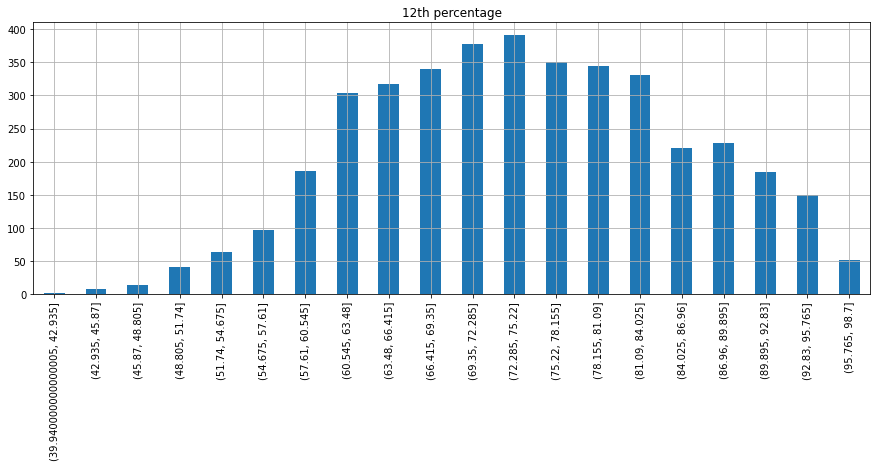

In [32]:

# Distribution of 12th percentage

print('mean markes scored ',df['12percentage'].mean())
print('median markes scored',df['12percentage'].median())

print()

print('Skewness:',skew(df['12percentage']))
print('Kurtosis:',kurtosis(df['12percentage']))

print()

plt.figure(figsize=(15,5))
df['12percentage'].value_counts(bins=20,sort=False).plot(kind='bar',title='12th percentage',grid = True)
plt.show()

mean markes scored  77.9254427213606
median markes scored 79.15

Skewness: -0.5907967422390255
Kurtosis: -0.11164680905297963



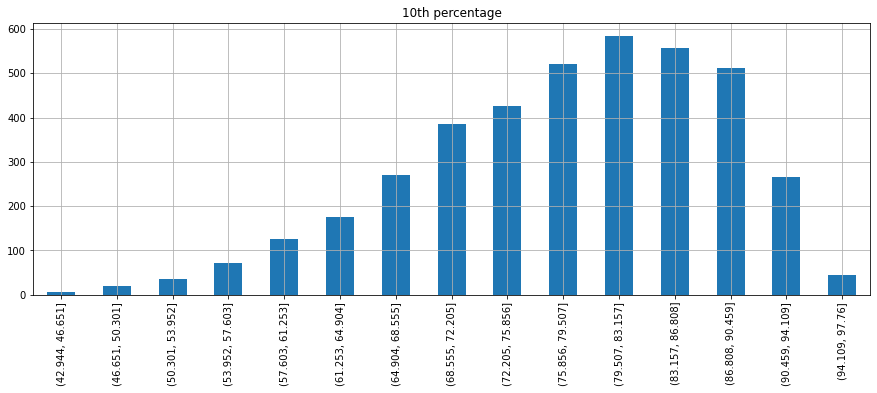

In [33]:
# Distribution of 10th percentage

print('mean markes scored ',df1['10percentage'].mean())
print('median markes scored',df1['10percentage'].median())
print()
print('Skewness:',skew(df1['10percentage']))
print('Kurtosis:',kurtosis(df1['10percentage']))
print()
plt.figure(figsize=(15,5))
df['10percentage'].value_counts(bins=15,sort=False).plot(kind='bar',title='10th percentage',grid = True)
plt.show()

mean Salary  307699.8499249625
median Salary 300000.0

Skewness: 6.44866054831297
Kurtosis: 80.82731823061802



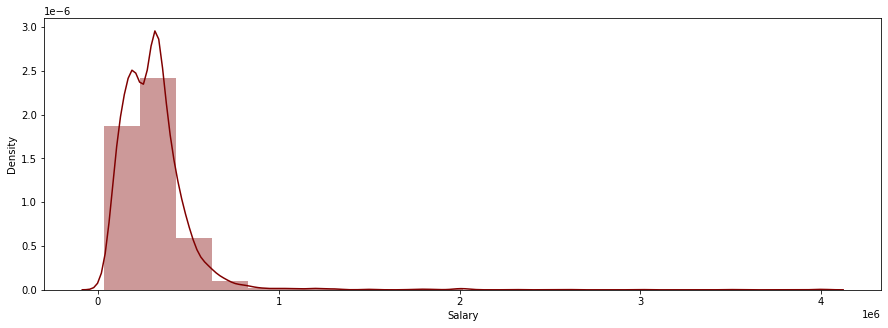

In [34]:

print('mean Salary ',df1['Salary'].mean())
print('median Salary',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True, color='maroon')
plt.show()

<h4>Observation:</h4>

- Salary of employees is not normally distributed i.e there is a right skewness in salary as there are outliers exist
- The dataset and the kurtosis is very high as mostly employees got there starting package of **Rs 300000**.


mean markes scored  285447.1586526099
median markes scored 300000.0

Skewness: 0.43205376284764696
Kurtosis: -0.2651888576188304



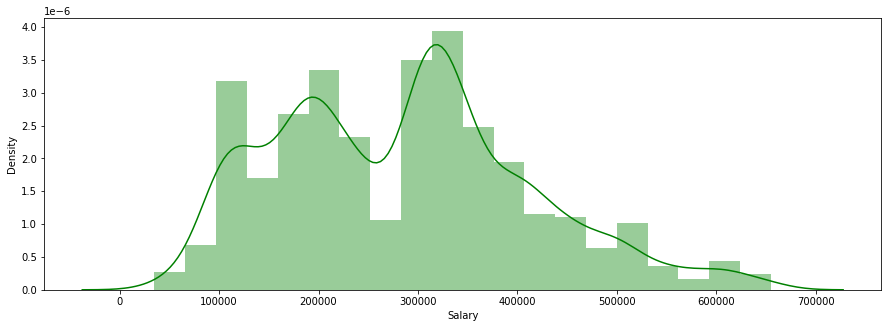

In [35]:
Q1=df1['Salary'].quantile(0.25)
Q2=df1['Salary'].quantile(0.5)
Q3=df1['Salary'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df1=df1[df1['Salary']<=UL]

print('mean markes scored ',df1['Salary'].mean())
print('median markes scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True, color='green')
plt.show()

<h3>Analysing age of candidates vs salary:</h3>

In [36]:
# Analysis only on the bases of years

df1['DOByear']=df1['DOB'].dt.year # Date of birth year
df1.drop(columns=['DOB'],axis=1,inplace=True)
df1=df1[df1['DOByear']>1977]

# Creating new features to calculate the age of candidates after completing graduation.
df1['GradAge']=abs(df1['GraduationYear']-df1['DOByear'])

In [37]:
(df1['GradAge']==1991).value_counts()

False    3887
True        1
Name: GradAge, dtype: int64

In [38]:
df1['GradAge'].unique()

array([  21,   23,   22,   24,   26,   28,   20,   25,   19,   17,   27,
         29, 1991], dtype=int64)

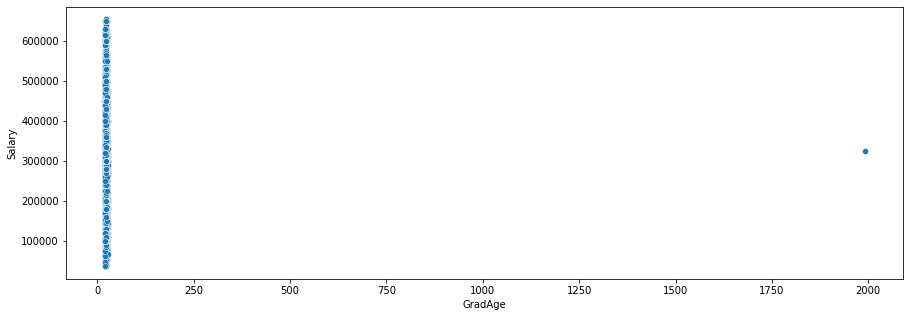

In [39]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.show()


<h4>Observation:</h4>
<div>There is a missing value in graduation year so i am imputing <strong>median</strong> value of graduation year in that place</div>
</p>

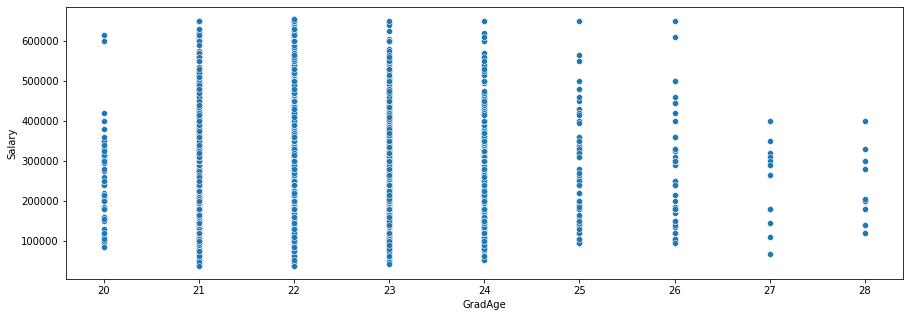

In [42]:
df1['GraduationYear'].replace(to_replace = 0, value = 2013, inplace = True)
df1['GradAge'] = abs(df1['GraduationYear']-df1['DOByear'])
df1 = df1[(df1['GradAge']>19) & (df1['GradAge']<29)]
plt.figure(figsize=(15,5))
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.show()

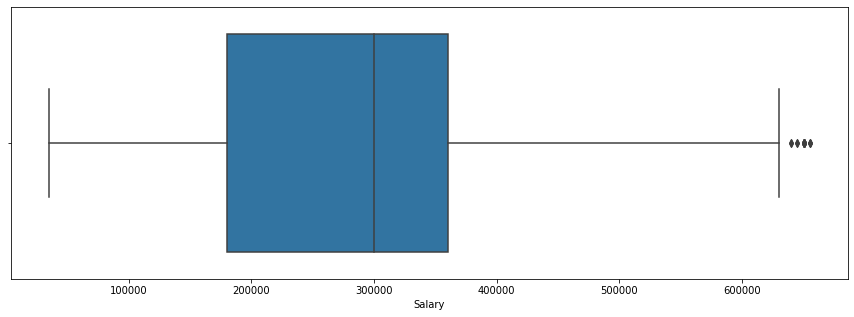

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['Salary'])
plt.show()

<h2>Data Visualization</h2>
<h3>Univariate Analysis</h3>
<h4>1.Gender Distribution</h4>

Males: 2943
Females: 937
Male to Female Gender Ratio: 3.14



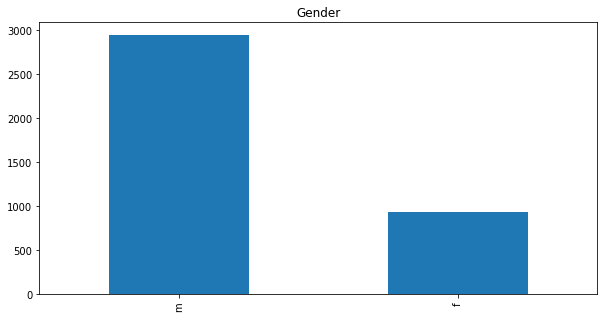

In [44]:
males = df1['Gender'].where(df1['Gender'] == 'm').count()
females = df1['Gender'].where(df1['Gender'] == 'f').count()
print("Males: {}".format(males))
print("Females: {}".format(females))
print("Male to Female Gender Ratio: {:.2f}".format(males / females))
print()
df1['Gender'].value_counts().plot(kind = 'bar', title = 'Gender', figsize = (10, 5))
plt.show()

<p>
<h4>Observation:</h4>
<div>More <strong>male</strong> candidates than <strong>female </strong> candidates.</div>
</p>

<h4>2.Academic scores distribution</h4>
<h5>10th percentage</h5>

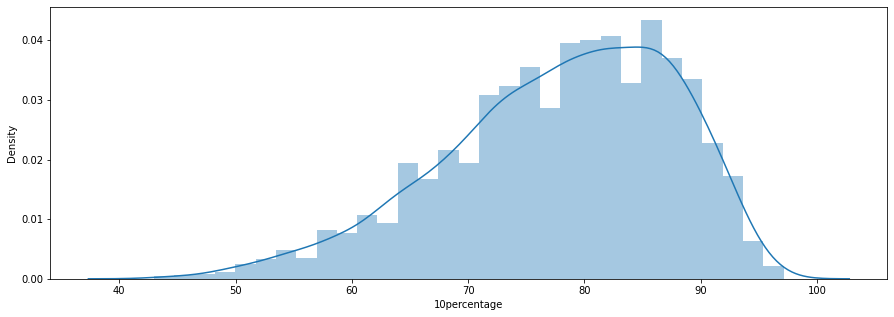

In [45]:
# Distribution of 10th percentage
plt.figure(figsize=(15,5))
sns.distplot(df1['10percentage'])
plt.show()

<p>
<h4>Observation:</h4>
<div> 1. Data is left skewed as some candidates didn't perform well in 10th standerd which impacts average score of all canditates.</div>
<div> i.e reduces the average scores as seen above <strong>mean= 77.92% & Median= 79.15%</strong></div>
<div> 2. Most of the students score around 79% marks</div>
</p>

<h4>12th percentage</h4>

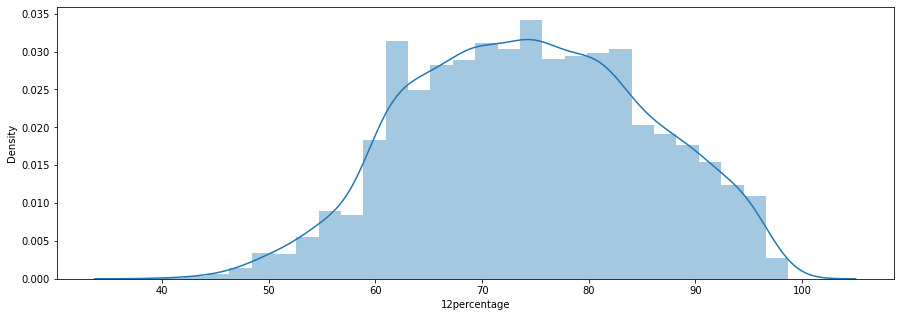

In [47]:
# Distribution of 12th percentage

plt.figure(figsize=(15,5))
sns.distplot(df1['12percentage'])
plt.show()

<p>
<h4>Observation:</h4>
<div>Data is almost normally distributed</div>
</p>

<h4>Collage GPA</h4>

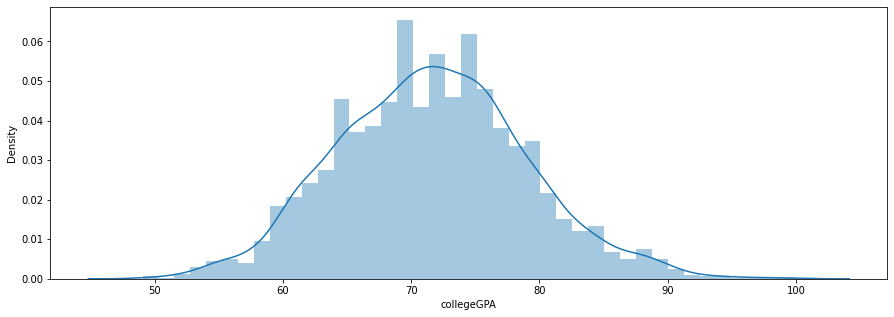

In [48]:

# Distribution of College grades

plt.figure(figsize=(15,5))
sns.distplot(df1['collegeGPA'])
plt.show()

<p>
<h4>Observation:</h4>
<div> 1.  Distribution of college GPA is approximately normal and most of students scored 71.7% in college</div>
</p>

<h3>3. College Tier distribution</h3>

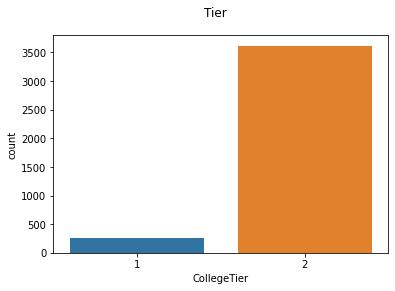

In [49]:
# Distribution of College Tier

sns.countplot(df1['CollegeTier'])
plt.suptitle('Tier')
plt.show()

<p>
<h4>Observation:</h4>
<div> 1.  Students from college Tier 2 are higher in number</div>
</p>

<h3>4. Degree distribution</h3>

<AxesSubplot:>

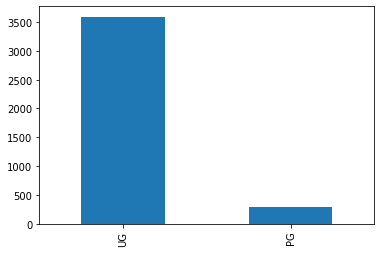

In [50]:
df1['Degree'].value_counts().plot(kind='bar')

<p>
<h4>Observation:</h4>
<div> B.Tech/B.E students are more than any others</div>
</p>

<h3>5. Specialization distribution</h3>

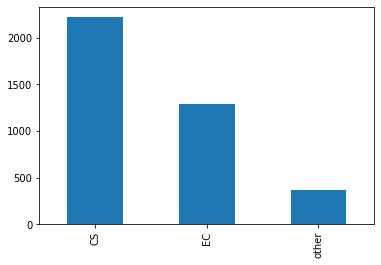

In [51]:

df1['Specialization'].value_counts().plot(kind='bar')
plt.show()

<p>
<h4>Observation:</h4>
<div> Students having specialization in computer science are higher in number.</div>
</p>

<h3>6. 10 board distribution</h3>

state    2238
cbse     1371
icse      271
Name: 10board, dtype: int64



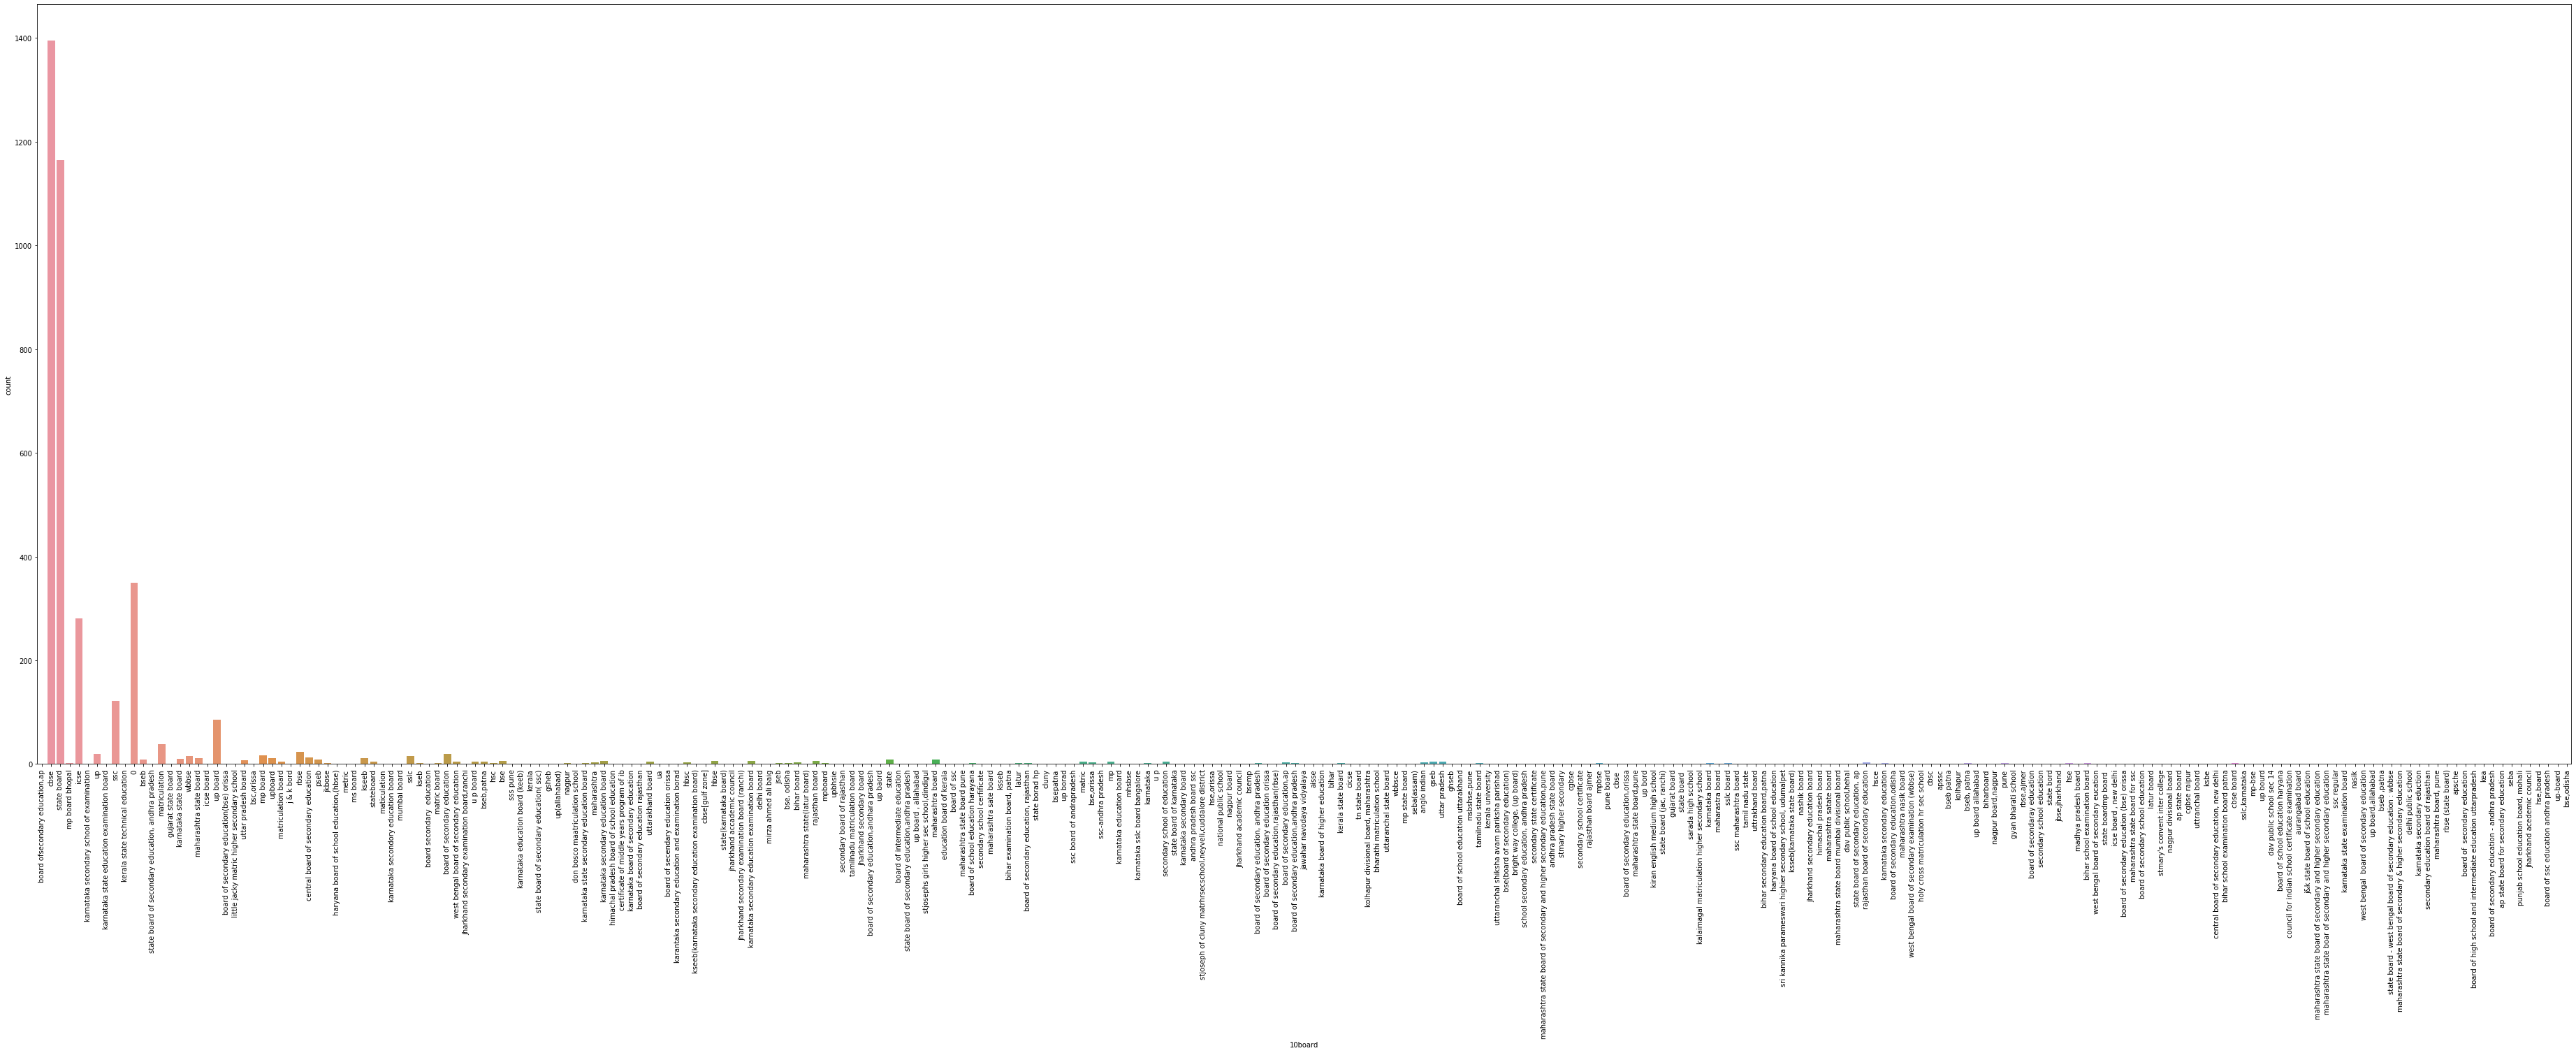

In [55]:
print(df1['10board'].value_counts())

print()
plt.figure(figsize=(65,20))
sns.countplot(df['10board'])
plt.xticks(rotation=90)
plt.show()

<p>
<h4>Observation:</h4>
<div> Most of the class10 students are from state board.</div>
</p>

<h3>7. 12board distribution</h3>

state    2005
cbse     1705
icse      170
Name: 12board, dtype: int64



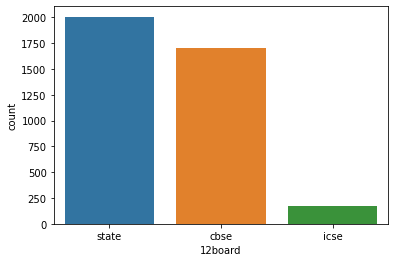

In [53]:

print(df1['12board'].value_counts())

print()

sns.countplot(df1['12board'])
plt.show()

<h2>Features Comparison with Salary</h2>
<h3>Bivariate analysis</h3>
<h4>1. Salary vs Gender</h4>

Gender
f    278388.473853
m    287891.267414
Name: Salary, dtype: float64
Gender
f    300000
m    300000
Name: Salary, dtype: int64



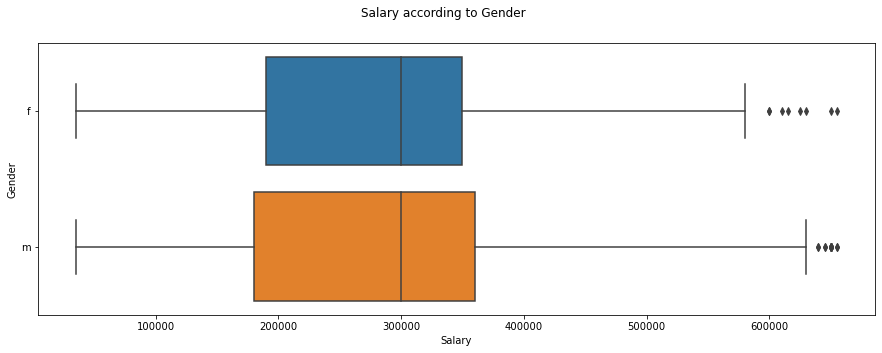

In [48]:

# Does gender affect salaries ?

print(df1.groupby('Gender')['Salary'].mean())
print(df1.groupby('Gender')['Salary'].median())

print()
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary', y = 'Gender', data=df1)
plt.suptitle('Salary according to Gender')
plt.show()

<p>
<h4>Observation:</h4>
<div> 1 Mean salary of males is slightly greater than females salary.</div>
<div> 2 Median salary earned by both the genders are equal</div>
</p>

<h4>2. Salary vs college state</h4>

CollegeState
Andhra Pradesh       305874.439462
Assam                365000.000000
Bihar                287000.000000
Chhattisgarh         261666.666667
Delhi                331282.894737
Gujarat              228809.523810
Haryana              285285.714286
Himachal Pradesh     320312.500000
Jammu and Kashmir    396428.571429
Jharkhand            387727.272727
Karnataka            316157.024793
Kerala               278030.303030
Madhya Pradesh       295686.813187
Maharashtra          277070.312500
Meghalaya            175000.000000
Orissa               296627.218935
Punjab               279247.311828
Rajasthan            282368.421053
Sikkim               360000.000000
Tamil Nadu           263715.083799
Telangana            284372.990354
Union Territory      186000.000000
Uttar Pradesh        272069.004525
Uttarakhand          284120.370370
West Bengal          268005.181347
Name: Salary, dtype: float64



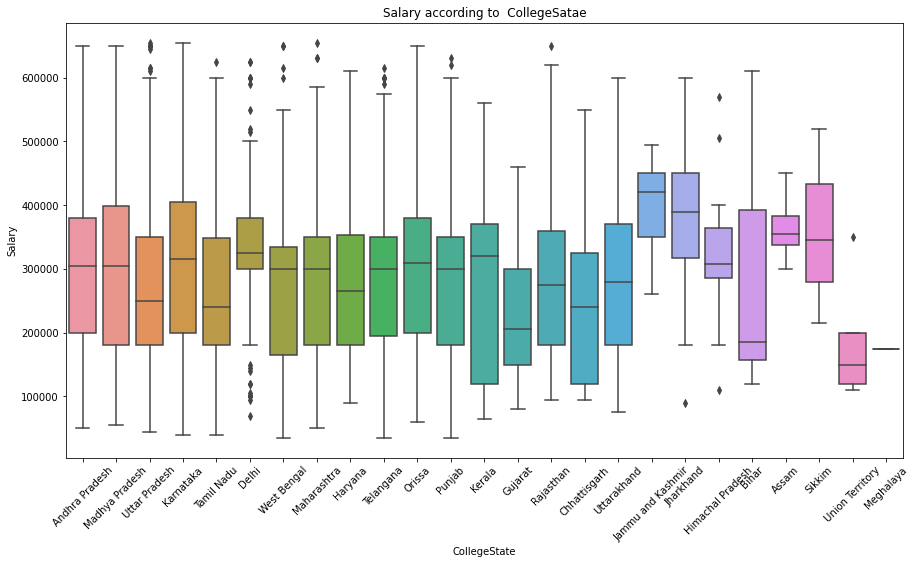

In [54]:
# Does loaction of college affect salaries of Candidates?

print(df1.groupby('CollegeState')['Salary'].mean())
print()
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 45)
sns.boxplot(x = 'CollegeState', y = 'Salary', data = df1)
plt.title('Salary according to  CollegeSatae')
plt.show()

### Zones:
<p>
<div> <strong>North Zone:</strong> Jammu and Kashmir, Himachal Pradesh, Punjab, Uttarakhand , Uttar Pradesh and Haryana.</div>
<div> <strong>East Zone:</strong> the east zone is comprised of states of Bihar, Orissa, Jharkhand, and West Bengal.</div>
<div> <strong>West Zone:</strong> This zone has the states of Rajasthan , Gujarat, Goa and Maharashtra
South Zone: States of Andhra Pradesh, Karnataka, Kerala and Tamil Nadu</div>
<div> <strong>Central Zone:</strong> Madhya Pradesh and Chhattisgarh</div>
</p>

### Observation:
- There is huge affect of college loaction on salaries of Candidates as it clearly visible above some college candidates.
- Hired at good package and some are getting very low package.
- Median salary of students from Meghalaya and Jammu&Kashmir is higher.


<h4>3. Salary vs Degree</h4>

Degree
PG    253732.394366
UG    288112.903226
Name: Salary, dtype: float64



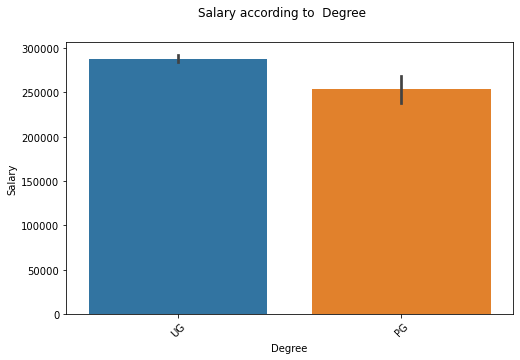

In [50]:
# Does degree awarded affect salaries of Candidates?

print(df1.groupby('Degree')['Salary'].mean())

print()

plt.figure(figsize = (8, 5))
plt.xticks(rotation = 45)
sns.barplot(x = 'Degree', y = 'Salary', data = df1)
plt.suptitle('Salary according to  Degree')
plt.show()

### Observation:
- There is not much difference in median salary earned by different degree holders but it's clearly visible that UG degree Candidates are getting huge packages as compare to other PG degree candidates.


<h4>4. Salary vs Specialization</h4>

Specialization
CS       288775.326430
EC       282623.839009
other    276822.888283
Name: Salary, dtype: float64



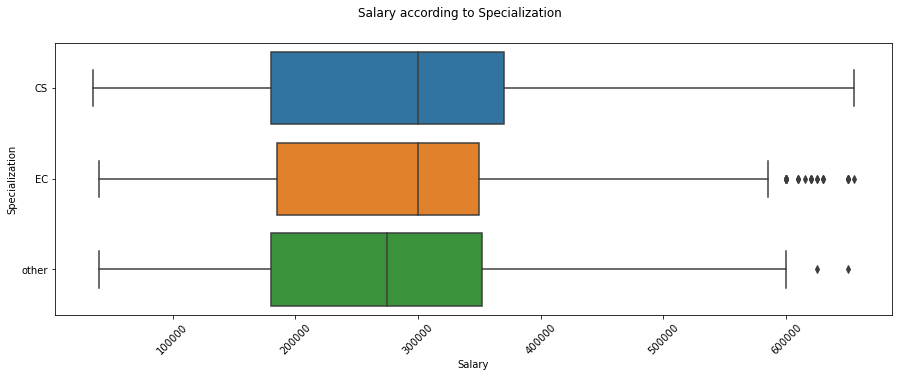

In [51]:
# Does specialization affect salary ?

print(df1.groupby('Specialization')['Salary'].mean())

print()

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.boxplot(x='Salary', y = 'Specialization', data=df1)
plt.suptitle('Salary according to Specialization')
plt.show()

### Observation:
- The mean salary of other depts is higher than salary of candidates having specialization in CS and EC.


<h4>5. Salary vs CollegeTier</h4>

CollegeTier
1    368288.973384
2    279583.632845
Name: Salary, dtype: float64



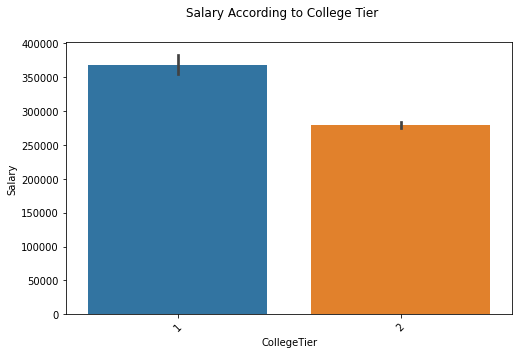

In [56]:
print(df1.groupby('CollegeTier')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = 'CollegeTier',y='Salary',data=df1)
plt.suptitle('Salary According to College Tier')
plt.show()

### Observation:
- Salary of students from Tier1 college is high.


<h4>6. Salary vs 10 board</h4>

10board
cbse     295342.815463
icse     306107.011070
state    277142.091153
Name: Salary, dtype: float64



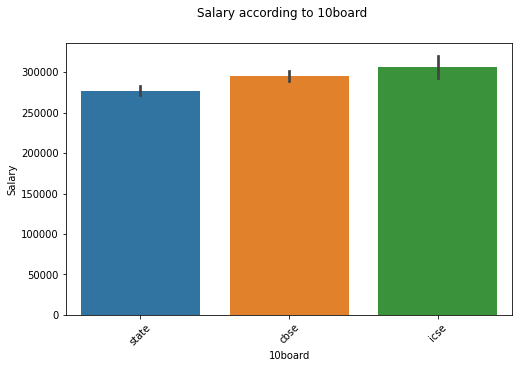

In [57]:

print(df1.groupby('10board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = '10board',y='Salary',data=df1)
plt.suptitle('Salary according to 10board')
plt.show()

### Observation:
- Salary of 10board students having board other than state,cbse,icse boards is higher.


<h4>7. Salary vs 12 board</h4>

12board
cbse     304891.495601
icse     316029.411765
state    266607.980050
Name: Salary, dtype: float64



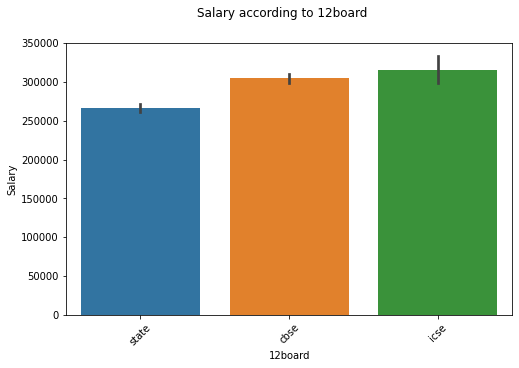

In [58]:
print(df1.groupby('12board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = '12board',y='Salary',data=df1)
plt.suptitle('Salary according to 12board')
plt.show()

### Observation:
- Salary of 12board students having board other than state,cbse,icse boards is higher.


<h4>8. Salary vs gradage</h4>

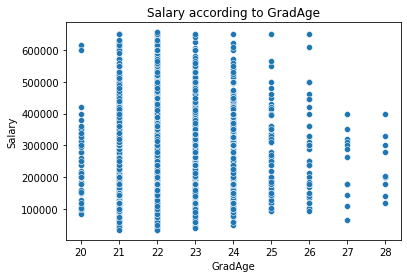

In [59]:
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.title('Salary according to GradAge')
plt.show()

### Observation:
- High salary is of students having age 23.


<h3>Correlation</h3>

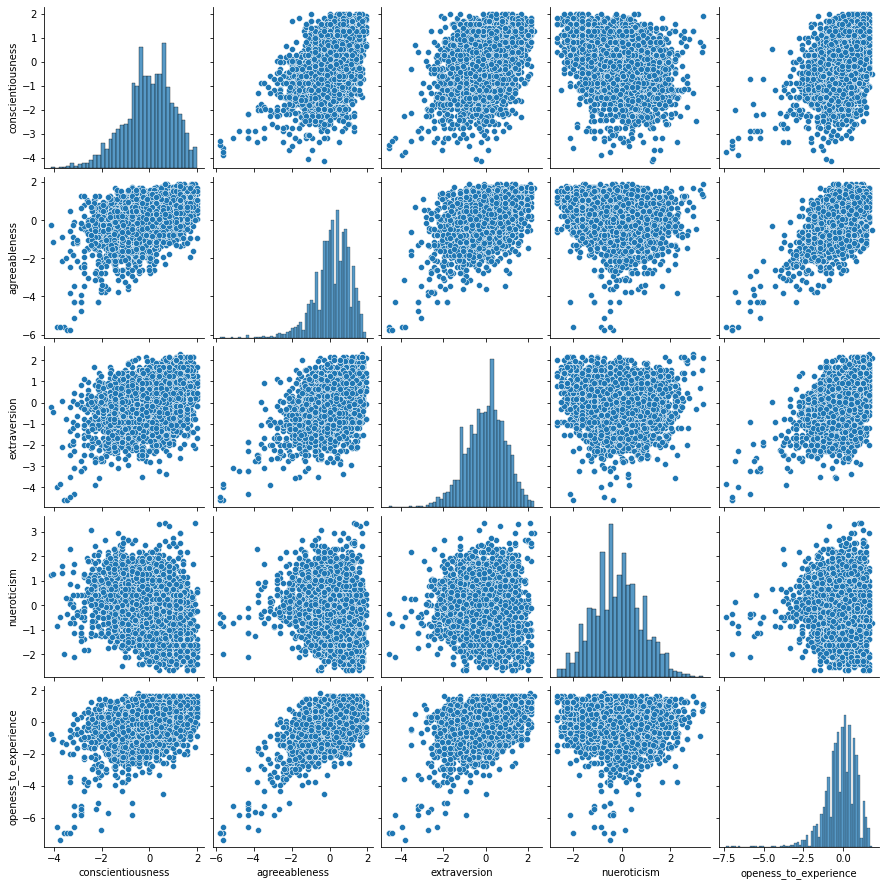

In [60]:
personality_scores=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


sns.pairplot(df1, vars = personality_scores)
plt.show()

<h3>Correlation of personality scores</h3>

<AxesSubplot:>

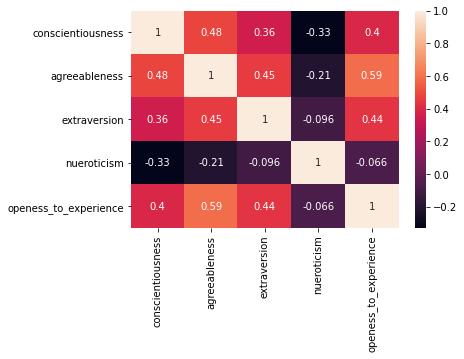

In [61]:
personality = df[['conscientiousness',
                'agreeableness',
                'extraversion',
                'nueroticism',
                'openess_to_experience']]
corrMatrix2 = personality.corr()
sns.heatmap(corrMatrix2, annot=True)

### Correlation of Academic scores

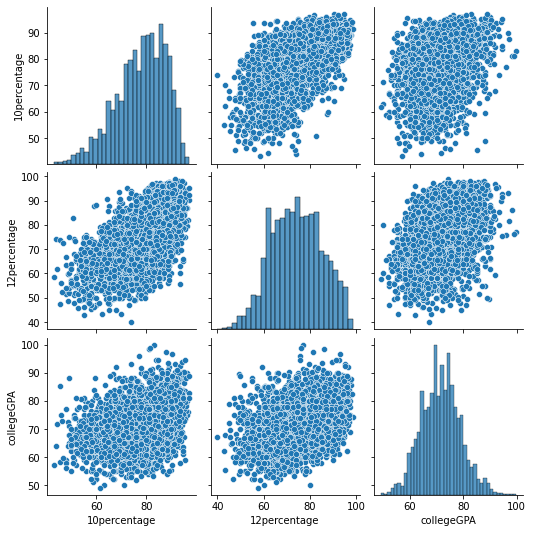

In [62]:


academic_performance = ['10percentage', '12percentage', 'collegeGPA']

sns.pairplot(df1, vars = academic_performance)
plt.show()

<h4>Correlation of 10th percentage , 12th percentage , college GPA and Salary</h4>


<AxesSubplot:>

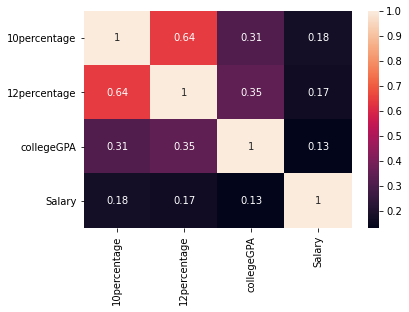

In [63]:
d = df[['10percentage',
                   '12percentage',
                   'collegeGPA','Salary']]
corrMatrix1 = d.corr()
sns.heatmap(corrMatrix1, annot=True)

### Correlation of Standard Test Scores

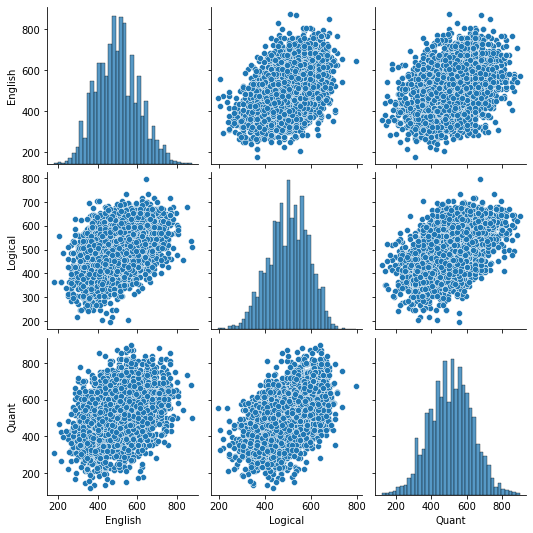

In [64]:
std_test_scores = ['English', 'Logical', 'Quant']
sns.pairplot(df1, vars = std_test_scores)
plt.show()

<h3>Correlation of Standared Test Scores</h3>

<AxesSubplot:>

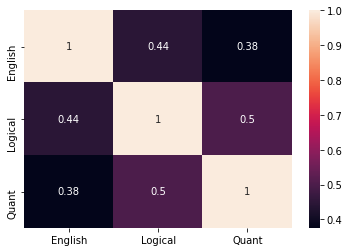

In [65]:
std_test = df[['English',
                   'Logical',
                   'Quant']]
corrMatrix3 = std_test.corr()
sns.heatmap(corrMatrix3, annot=True)

### Correlation between salary and all numerical feature

In [66]:
df1.drop(['Gender', 'CollegeTier', 'Degree', 'Specialization', 'CollegeState'],axis=1).corr()['Salary']

Salary                   1.000000
10percentage             0.283515
12graduation            -0.154027
12percentage             0.279273
collegeGPA               0.223640
CollegeCityTier          0.034020
GraduationYear          -0.244569
English                  0.252530
Logical                  0.248465
Quant                    0.346894
Domain                   0.157738
ComputerProgramming      0.165088
ElectronicsAndSemicon    0.026258
ComputerScience         -0.134262
MechanicalEngg           0.003966
ElectricalEngg          -0.049185
TelecomEngg             -0.006664
CivilEngg                0.029782
conscientiousness       -0.056761
agreeableness            0.061764
extraversion            -0.032366
nueroticism             -0.053962
openess_to_experience   -0.009467
DOByear                 -0.144791
GradAge                 -0.058927
Name: Salary, dtype: float64

In [67]:
df1.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64
ComputerScience                   int64


<h3>Creating Dummy data for categorical variables</h3>

In [64]:
categorical_features= ['Specialization', 'CollegeState', 'Gender', 'Degree','12board','10board','CollegeTier','CollegeCityTier']


for i in categorical_features:
    unique = len(df1[i].unique())
    print("{}: {}".format(i, unique))

Specialization: 3
CollegeState: 25
Gender: 2
Degree: 2
12board: 3
10board: 3
CollegeTier: 2
CollegeCityTier: 2


In [65]:
df2 = pd.get_dummies(df1, columns = categorical_features )

### Column standardization

In [66]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
salary=s.fit_transform(df2[['Salary']])
percent_10=s.fit_transform(df2[['10percentage']])
percent_12=s.fit_transform(df2[['12percentage']])

In [67]:
print("Salary : \n {}". format(salary[:5]))
print()
print("10 Percentage : \n {}". format(percent_10[:5]))
print()
print("12 Percentage : \n {}". format(percent_12[:5]))

Salary : 
 [[ 1.06260666]
 [ 1.69509364]
 [ 0.31152837]
 [-0.67673255]
 [ 0.11387618]]

10 Percentage : 
 [[0.65302093]
 [0.7648385 ]
 [0.72417757]
 [0.01261118]
 [1.22430709]]

12 Percentage : 
 [[ 1.94435253]
 [ 0.96186121]
 [-0.56645863]
 [ 0.21589558]
 [ 1.14380405]]


In [68]:
df1.shape

(3880, 37)

In [69]:
df2.shape

(3880, 71)

In [70]:
df2.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Designations', 'DOByear', 'GradAge', 'Specialization_CS',
       'Specialization_EC', 'Specialization_other',
       'CollegeState_Andhra Pradesh', 'CollegeState_Assam',
       'CollegeState_Bihar', 'CollegeState_Chhattisgarh', 'CollegeState_Delhi',
       'CollegeState_Gujarat', 'CollegeState_Haryana',
       'CollegeState_Himachal Pradesh', 'CollegeState_Jammu and Kashmir',
       'CollegeState_Jharkhand', 'CollegeState_Karnataka',
       'CollegeState_Kerala', 'CollegeState_Madhya Pradesh',
       'CollegeState_Maharashtra', 'CollegeState_Meghal

## Research on Hypothesis

### Creating new dataframe for Hypothesis testing

In [71]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [72]:
df['Joinning_year'] = df['DOJ'].dt.year

In [73]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Joinning_year'],
      dtype='object')

In [74]:
df_1=df[['Designation','Gender','Salary','Specialization','GraduationYear','Joinning_year']]

In [75]:
df_1.head()

,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
0,senior quality engineer,f,420000,computer engineering,2011,2012
1,assistant manager,m,500000,electronics and communication engineering,2012,2013
2,systems engineer,f,325000,information technology,2014,2014
3,senior software engineer,m,1100000,computer engineering,2011,2011
4,get,m,200000,electronics and communication engineering,2012,2014


In [76]:
df_2=df_1.where(df_1['GraduationYear']==df_1['Joinning_year'])
df_2.head()

,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,systems engineer,f,325000.0,information technology,2014.0,2014.0
3,senior software engineer,m,1100000.0,computer engineering,2011.0,2011.0
4,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_2.isnull().sum()

Designation       1709
Gender            1709
Salary            1709
Specialization    1709
GraduationYear    1709
Joinning_year     1709
dtype: int64

In [78]:
df_2.dropna(inplace=True)

In [79]:
df_2

,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
2,systems engineer,f,325000.0,information technology,2014.0,2014.0
3,senior software engineer,m,1100000.0,computer engineering,2011.0,2011.0
5,system engineer,m,300000.0,electronics and communication engineering,2014.0,2014.0
6,java software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
8,electrical engineer,m,600000.0,electronics and electrical engineering,2013.0,2013.0
...,...,...,...,...,...,...
3987,network engineer,f,280000.0,electronics and communication engineering,2012.0,2012.0
3989,software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
3991,systems analyst,m,630000.0,electronics & telecommunications,2011.0,2011.0
3994,technical writer,f,100000.0,electronics and communication engineering,2013.0,2013.0


In [80]:
df3=df_2.where(df_2['Specialization']=='computer science & engineering')

In [81]:
df3

,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,java software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3987,NaN,NaN,NaN,NaN,NaN,NaN
3989,software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
3991,NaN,NaN,NaN,NaN,NaN,NaN
3994,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df3.isnull().sum()

Designation       1837
Gender            1837
Salary            1837
Specialization    1837
GraduationYear    1837
Joinning_year     1837
dtype: int64

In [83]:
df3.dropna(inplace=True)

In [84]:
df3.isnull().sum()

Designation       0
Gender            0
Salary            0
Specialization    0
GraduationYear    0
Joinning_year     0
dtype: int64

In [85]:
df3

,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
6,java software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
24,programmer analyst,m,335000.0,computer science & engineering,2014.0,2014.0
25,systems analyst,f,435000.0,computer science & engineering,2012.0,2012.0
31,software engineer,m,340000.0,computer science & engineering,2014.0,2014.0
41,software developer,m,145000.0,computer science & engineering,2014.0,2014.0
...,...,...,...,...,...,...
3962,ui developer,m,110000.0,computer science & engineering,2013.0,2013.0
3969,technical engineer,m,330000.0,computer science & engineering,2015.0,2015.0
3975,game developer,m,300000.0,computer science & engineering,2014.0,2014.0
3989,software engineer,m,300000.0,computer science & engineering,2014.0,2014.0


In [86]:
df3['Designation'].unique()

array(['java software engineer', 'programmer analyst', 'systems analyst',
       'software engineer', 'software developer', 'java developer',
       'technical support engineer', 'android developer',
       'assistant software engineer', 'network administrator',
       'php developer', 'application developer',
       'trainee software engineer', 'system engineer', 'project engineer',
       'asp.net developer', 'business analyst', 'web developer',
       'quality analyst', 'programmer analyst trainee',
       'data entry operator', 'software development engineer',
       'it support specialist', 'assistant manager',
       'system administrator', 'assistant systems engineer', 'engineer',
       'software trainee', 'associate software engineer',
       'systems engineer', 'customer service', 'data scientist',
       '.net developer', 'automation engineer', 'associate engineer',
       'marketing analyst', 'sql dba', 'etl developer', 'ios developer',
       'software devloper', 'assistan

In [87]:
replace_list_Software=['game developer',
                        'junior .net developer', 
                        'jr. software developer',
                        'ruby on rails developer', 
                        'junior software engineer',
                        'programmer', 
                        'salesforce developer',
                        'application engineer',
                        'jr. software engineer',
                        'ui developer',
                        'java software engineer',
                        'software engineer', 
                        'software developer',
                        'java developer',
                        'android developer',
                        'php developer', 
                        'application developer',
                        'trainee software engineer',
                        'front end developer',
                        '.net web developer',
                        'oracle dba',
                        'assistant software engineer', 
                        'asp.net developer', 
                        'web developer',
                        'software development engineer',
                        'software trainee', 
                        '.net developer', 
                        'etl developer', 'ios developer',
                        'software devloper', 
                        'software test engineer',
                        'web designer',
                        'senior software engineer',
                        'web designer and seo',
                        'test engineer', 
                        'html developer',
                        'full stack developer',
                        'assistant programmer']

replace_list_Associate_Engineer=['associate software engineer',
                                'associate software developer',
                                'software engineering associate']

replace_list_Hardware_Engineer =['network administrator',
                                'system administrator',
                                'assistant systems engineer',
                                'network engineer',
                                'assistant system engineer trainee']

replace_list_Programming_Analyst = ['programmer analyst']

for i in replace_list_Software:
    df3['Designation'].replace(i,'software engineer',inplace=True)

for i in replace_list_Associate_Engineer:
    df3['Designation'].replace(i,'associate engineer',inplace=True)

for i in replace_list_Hardware_Engineer:
    df3['Designation'].replace(i,'hardware engineer',inplace=True)

for i in replace_list_Programming_Analyst:
    df3['Designation'].replace(i,'programmer analyst',inplace=True)
     
       
       
        

In [88]:
new_df = df3[(df3['Designation']=='software engineer') |
                 (df3['Designation']=='programmer analyst') |
                 (df3['Designation']=='hardware engineer') |
                 (df3['Designation']=='associate engineer')]

In [89]:
new_df

,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
6,software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
24,programmer analyst,m,335000.0,computer science & engineering,2014.0,2014.0
31,software engineer,m,340000.0,computer science & engineering,2014.0,2014.0
41,software engineer,m,145000.0,computer science & engineering,2014.0,2014.0
48,software engineer,m,390000.0,computer science & engineering,2013.0,2013.0
...,...,...,...,...,...,...
3949,software engineer,f,200000.0,computer science & engineering,2014.0,2014.0
3962,software engineer,m,110000.0,computer science & engineering,2013.0,2013.0
3975,software engineer,m,300000.0,computer science & engineering,2014.0,2014.0
3989,software engineer,m,300000.0,computer science & engineering,2014.0,2014.0


In [90]:
new_df.isnull().sum()

Designation       0
Gender            0
Salary            0
Specialization    0
GraduationYear    0
Joinning_year     0
dtype: int64

In [91]:
new_df['Designation'].unique()

array(['software engineer', 'programmer analyst', 'hardware engineer',
       'associate engineer'], dtype=object)

<AxesSubplot:xlabel='Salary'>

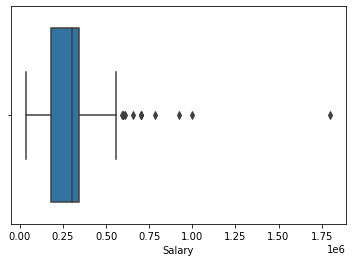

In [92]:
sns.boxplot(new_df['Salary'])

In [93]:
new_df['Salary']=new_df['Salary']/100000

In [94]:
new_df['Salary']

6       3.00
24      3.35
31      3.40
41      1.45
48      3.90
        ... 
3949    2.00
3962    1.10
3975    3.00
3989    3.00
3996    2.00
Name: Salary, Length: 313, dtype: float64

In [95]:
new_df.reset_index()

,index,Designation,Gender,Salary,Specialization,GraduationYear,Joinning_year
0,6,software engineer,m,3.00,computer science & engineering,2014.0,2014.0
1,24,programmer analyst,m,3.35,computer science & engineering,2014.0,2014.0
2,31,software engineer,m,3.40,computer science & engineering,2014.0,2014.0
3,41,software engineer,m,1.45,computer science & engineering,2014.0,2014.0
4,48,software engineer,m,3.90,computer science & engineering,2013.0,2013.0
...,...,...,...,...,...,...,...
308,3949,software engineer,f,2.00,computer science & engineering,2014.0,2014.0
309,3962,software engineer,m,1.10,computer science & engineering,2013.0,2013.0
310,3975,software engineer,m,3.00,computer science & engineering,2014.0,2014.0
311,3989,software engineer,m,3.00,computer science & engineering,2014.0,2014.0


In [96]:
new_df.Salary.unique()

array([ 3.  ,  3.35,  3.4 ,  1.45,  3.9 ,  2.5 ,  2.4 ,  3.3 ,  3.25,
        2.35,  2.9 ,  2.  ,  3.75,  1.8 ,  0.7 ,  1.2 ,  0.95,  3.05,
        1.1 ,  5.6 ,  7.  ,  3.2 ,  1.35,  7.85,  1.  ,  4.75,  1.9 ,
        4.5 ,  2.6 ,  0.65,  2.75,  3.5 ,  4.2 ,  3.1 ,  2.2 ,  4.  ,
        5.15,  5.  ,  3.15,  1.05,  1.85,  1.6 ,  4.8 ,  2.05,  1.5 ,
        5.5 ,  2.25,  2.8 ,  6.  ,  6.55,  5.9 ,  1.55,  2.1 ,  1.65,
        3.6 ,  0.75,  0.85, 10.  ,  1.3 , 18.  ,  1.15,  6.1 ,  4.3 ,
        3.8 ,  2.3 ,  4.1 ,  1.95,  2.95,  0.35,  9.25,  3.7 ])

## Times of India article dated Jan 18, 2019 states that *“After  doing  your  Computer Science Engineering  if  you  take  up  jobs  as  a Programming  Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.*” 

## Test this claim with the data given to you.

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \geq 3.0  $$
Null Hypothesis (Status Quo): $$ H_0: \mu \leq 3.0 $$

Step - 2:  
* Collect a sample of size n = 40 
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}  \: for\: Known \:variance   $$ 
                        

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: 
<p> 

$$ ?\: tailed\: z-test\::  reject \ H_0 \ if \ ? $$

<p/>
<p> 

<p/>

Step - 5.2: Compute p-value for z-test.

In [97]:
l= new_df.Salary.sample(n = 40) #Sample size n=40

l

1139    3.15
55      2.50
3818    2.40
1154    1.80
122     3.00
3746    3.25
2236    2.40
1926    3.10
1920    3.15
1994    3.00
2508    1.30
1486    3.10
1996    6.55
2576    1.15
3684    1.20
2577    3.50
3585    9.25
149     2.90
161     2.00
1194    1.85
265     1.20
3566    1.20
2453    2.50
938     1.00
1861    4.00
454     1.20
1100    1.20
2052    3.00
69      2.50
1992    3.00
2762    4.50
1703    5.00
2434    0.85
3402    2.20
416     1.00
819     3.50
723     4.20
3700    0.95
1805    1.80
3975    3.00
Name: Salary, dtype: float64

In [98]:
s_mean=sum(l)/len(l) #Smaple mean
s_mean

2.70875

In [99]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,313.0,2.876198,1.628178,0.35,1.8,3.0,3.4,18.0
GraduationYear,313.0,2013.693291,0.631837,2011.00,2013.0,2014.0,2014.0,2015.0
Joinning_year,313.0,2013.693291,0.631837,2011.00,2013.0,2014.0,2014.0,2015.0


- **Min** Salary 0.35 lakh INR per Annum, **Max** Salary 18 lakh INR per Annum.
- **Poplulation STD** of Salary ~ 1.63 

In [100]:
from scipy.stats import norm
from scipy.stats import t


# Two Tail - Calculating the z-critical value

confidence_level = 0.90

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.6448536269514722


In [101]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [102]:
import statistics as stat
print(" the population standard deviation    S={}".format(stat.pstdev(new_df.Salary))) #Sample Standard Deviation

 the population standard deviation    S=1.6255745366428538


In [103]:
#Defining the sample and population parameters

sample_size = 20
sample_mean = s_mean
pop_mean = 2.87
pop_std = 1.63

In [104]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-0.4424122225421361


Text(2.70875, 0.0007, 'x_bar')

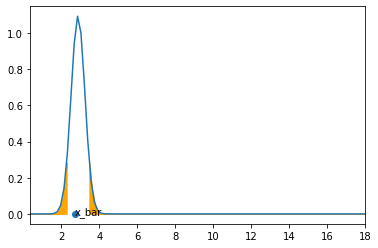

In [105]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 0.35
x_max = 18.0


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

#### In this case sample mean doesn't fall in the rejection region
#### i.e. here we fail to reject the Null Hypothesis

In [106]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [107]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.6581909359995441
Fail to reject Null Hypothesis


## Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

### Checking unique values of Gender and Specialisation

In [108]:
df_2.Gender.value_counts()

m    1740
f     549
Name: Gender, dtype: int64

In [109]:
df_2.Specialization.value_counts()

electronics and communication engineering      461
computer science & engineering                 452
information technology                         377
computer engineering                           331
computer application                           158
mechanical engineering                         135
electronics and electrical engineering         107
electronics & telecommunications                60
electrical engineering                          50
civil engineering                               24
information science engineering                 16
electronics & instrumentation eng               13
electronics and instrumentation engineering     12
instrumentation and control engineering         11
biotechnology                                    9
electronics engineering                          8
industrial & production engineering              7
other                                            7
chemical engineering                             6
telecommunication engineering  

###  To check the **dependency** between **Gender** and **Specialisation** we have to do Chi2 test.

<center><p> <h2> Understanding  the  Chi^2   Test <h2> <p/></center>

Lets make a bold Claim that  Gender and Specialization are dependent.

Step - 1:  
i.e. Alternate Hypothesis: $$ H_1: They \ are \ Dependent $$
and Null Hypothesis: $$ H_0: They \ are \ Independent $$

Step - 2:  
* Collect the sample of size n
* Compute the sample frequencies

Step - 3: Compute $ \chi^2 $ test statistic  
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.
* Have a look at Observed Frequencies (in the sample)
* Compute the Expected Frequencies (under null hyp assumption) $$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$
Now, test statistic can be computed using below mentioned formula: $$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule  
* Chi Square Test $$ if \ \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
* p-value Test $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [110]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(df_2.Specialization, df_2.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,0,1,1
applied electronics and instrumentation,1,4,5
automobile/automotive engineering,0,2,2
biomedical engineering,2,0,2
biotechnology,7,2,9
ceramic engineering,0,1,1
chemical engineering,1,5,6
civil engineering,5,19,24
computer and communication engineering,0,1,1


In [111]:
# These are the observed frequencies

observed = pd.crosstab(df_2.Specialization, df_2.Gender)

observed

Gender,f,m
Specialization,,
aeronautical engineering,0,1
applied electronics and instrumentation,1,4
automobile/automotive engineering,0,2
biomedical engineering,2,0
biotechnology,7,2
ceramic engineering,0,1
chemical engineering,1,5
civil engineering,5,19
computer and communication engineering,0,1


In [112]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(85.74267562000007,
 3.540046038143318e-05,
 40,
 array([[2.39842726e-01, 7.60157274e-01],
        [1.19921363e+00, 3.80078637e+00],
        [4.79685452e-01, 1.52031455e+00],
        [4.79685452e-01, 1.52031455e+00],
        [2.15858453e+00, 6.84141547e+00],
        [2.39842726e-01, 7.60157274e-01],
        [1.43905636e+00, 4.56094364e+00],
        [5.75622543e+00, 1.82437746e+01],
        [2.39842726e-01, 7.60157274e-01],
        [3.78951507e+01, 1.20104849e+02],
        [7.93879423e+01, 2.51612058e+02],
        [2.39842726e-01, 7.60157274e-01],
        [1.08408912e+02, 3.43591088e+02],
        [9.59370904e-01, 3.04062910e+00],
        [2.39842726e-01, 7.60157274e-01],
        [2.39842726e-01, 7.60157274e-01],
        [1.19921363e+01, 3.80078637e+01],
        [3.11795544e+00, 9.88204456e+00],
        [1.43905636e+01, 4.56094364e+01],
        [1.10567497e+02, 3.50432503e+02],
        [2.39842726e-01, 7.60157274e-01],
        [2.56631717e+01, 8.13368283e+01],
        [2.87811271e+00, 9.

In [113]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df4 = chi2_contingency(observed)[2]
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df4)

chi2_critical

51.80505721331751

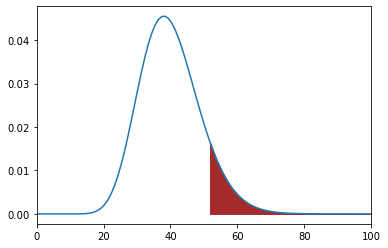

In [114]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df4)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df4)
plt.fill_between(x1, y1, color='brown')

In [115]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [116]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


## Conclusion:

- We have done EDA on **Aspiring Mind Employment Outcome 2015 (AMEO)** dataset. 
- We have done univariate analysis,bivariate analysis with some interesting observations.
- Mostly employees got there starting package of Rs 300000.
- Only ~24% Female candidates persued graduation.We need to motivate more females for graduation.
- The mean salary of other depts is higher than salary of candidates having specialization in **CS** and **EC**.
- We created dummy variables and did column standardization.  
- We did hypothesis testing on a Times Of India Article claim. We have come to know that *“After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” *
- We did another hypethesis testing to check dependecy between **Gender** and **Specialisation**. We have come to know that both are dependant features.

# END!! Happy Learning 😇😇
